In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt   
import seaborn as sns  

In [3]:
df = pd.read_csv(r"C:\Users\nikhi\Downloads\New folder\blinkit_data.csv")

In [4]:
df.head(10)


,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2000,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


In [5]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [6]:
df['Item Fat Content'] = df['Item Fat Content'].replace({
    'reg': 'Regular',
    'REG': 'Regular'
})


In [7]:
df['Item Fat Content'] = df['Item Fat Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat'
})


In [8]:
print(df['Item Fat Content'].unique())


['Regular' 'Low Fat']


In [17]:
# Total Sales
total_Sales = df['Sales'].sum()

#Average sales
avg_Sales = df['Sales'].mean()

#no of item sold 
no_of_item_sold = df ['Sales'].count()

#average rating
avg_rating =df['Rating'].mean()
#display 
print(f"total Sales: ${total_Sales:,.0f}")
print(f"Average Sales: ${avg_Sales:,.1f}")
print(f"Number of Items Sold: {no_of_item_sold:,.0f}")
print(f"Average Rating: {avg_rating:.1f}")

total Sales: $1,201,681
Average Sales: $141.0
Number of Items Sold: 8,523
Average Rating: 4.0


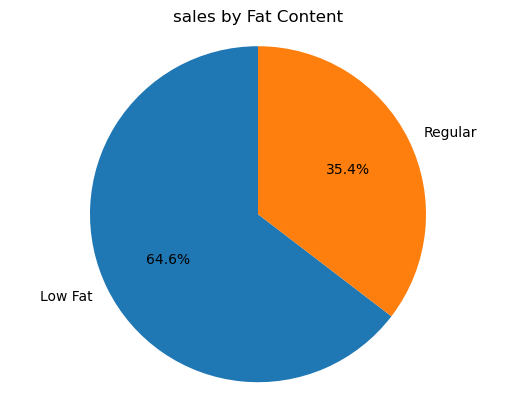

In [19]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

plt.pie(sales_by_fat, labels= sales_by_fat. index,
           autopct = '%.1f%%' ,
        startangle = 90)
plt.title('sales by Fat Content')
plt.axis('equal')
plt.show()

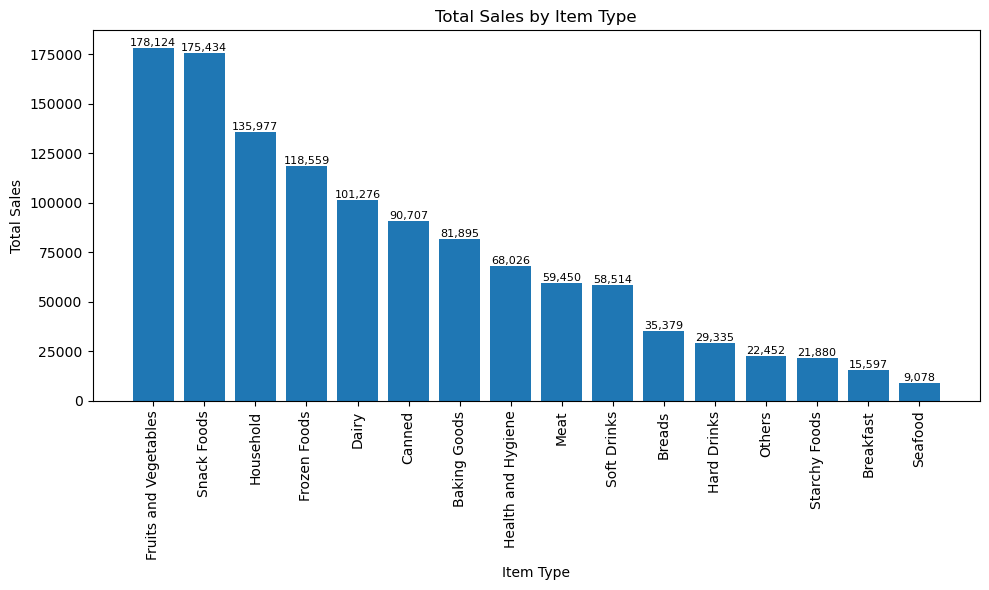

In [20]:
# 📊 Total Sales by Item Type

# Group data by 'Item Type' and sum up the Sales
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

# Add values on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height(),
             f'{bar.get_height():,.0f}',
             ha='center', va='bottom', fontsize=8)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


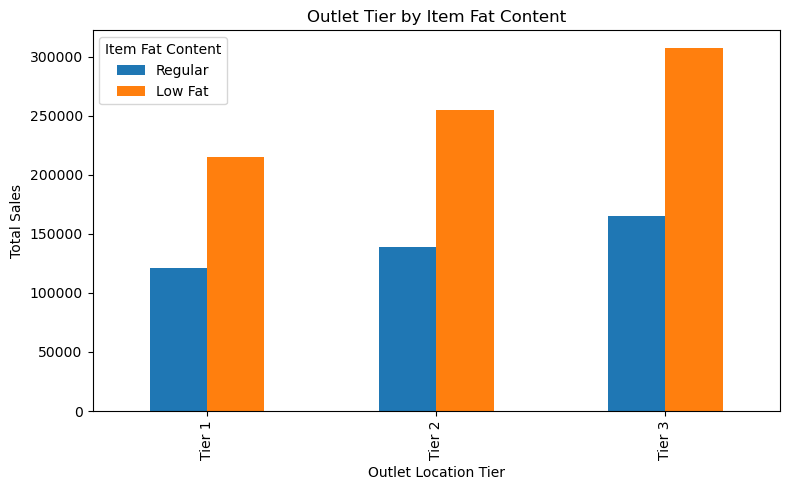

In [21]:
# 📊 Fat Content by Outlet for Total Sales

# Group data by 'Outlet Location Type' and 'Item Fat Content' and sum the Sales
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()

# Keep only Regular and Low Fat categories (optional)
grouped = grouped[['Regular', 'Low Fat']]

# Plot the grouped bar chart
ax = grouped.plot(kind='bar', figsize=(8, 5), title='Outlet Tier by Item Fat Content')

# Add labels and legend
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


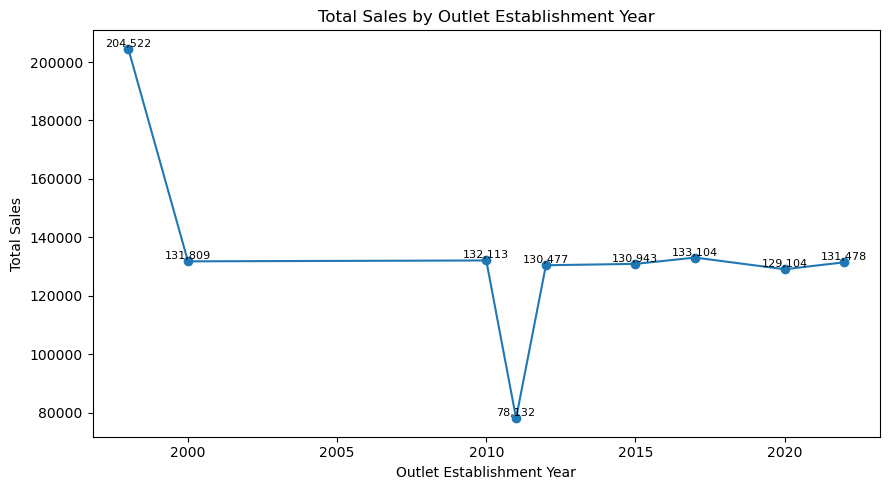

In [22]:
# 📈 Total Sales by Outlet Establishment Year

# Group data by 'Outlet Establishment Year' and sum up the Sales
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

# Create the line plot
plt.figure(figsize=(9, 5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Outlet Establishment Year')

# Add value labels on each point
for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


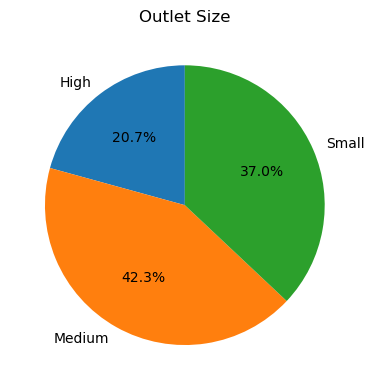

In [23]:
# 🥧 Sales by Outlet Size

# Group data by 'Outlet Size' and sum up the Sales
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(sales_by_size, 
        labels=sales_by_size.index, 
        autopct='%1.1f%%', 
        startangle=90)

# Add title and layout
plt.title('Outlet Size')
plt.tight_layout()
plt.show()


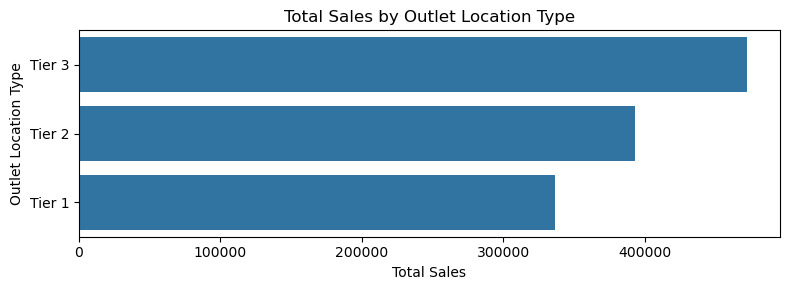

In [24]:
# 🏙️ Sales by Outlet Location

# Group data by 'Outlet Location Type' and sum up the Sales
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()

# Sort the data by Sales (highest to lowest)
sales_by_location = sales_by_location.sort_values('Sales', ascending=False)

# Create the bar plot
plt.figure(figsize=(8, 3))  # Smaller height, enough width
ax = sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_location)

# Add labels and title
plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')

# Adjust layout
plt.tight_layout()  # Ensures layout fits without scroll
plt.show()
